### A Quick and dirty introduction to QuTiP basics

The python package Quantum Toolbox in Python (QuTiP) provides a host of funcationality that is useful in our study of quantum simulation algorithms.  This notebook provides a quick rundown of the essentials. For more detail, see the [project documentation](http://qutip.org/tutorials.html).

QuTiP is available for conda within the conda-forge repository and can be installed with

```
conda install -c conda-forge qutip 
```

Once installed, you can import it in the usual way.

In [3]:
    import numpy as np
    import qutip as qt
    import matplotlib.pyplot as plt

#### State Vectors
There are two ways we'll look at for creating standard computational basis states. The first is the `basis` function and the second is `ket`.  The key difference is that `basis` creates a state in a $N$ dimensional space where `ket` creates a state in a composite, or multipartite, space.  

For example, let's create three qubit basis vectors for the state 3 or 0011.

In [4]:
st_basis = qt.basis(2**3,3)
st_ket = qt.ket('011')

The demension of `st_basis` indicates a 8x1 dimensional space. The physical shape of which is, of course 8x1. The type clearly indiaces that `st_basis` is a ket, or column vector.

In [5]:
st_basis

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]

On the other hand, `st_ket` shows a dimensionality of 2x2x2. This still results in a 8x1 column vector, but the underlying dimensionality is that of a multipartite system of 3 2-level quantum systems, i.e. qubits. 

In [6]:
st_ket

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]

In both cases we can get the corresponding bra, or row vector, using the ``dag`` methdod which applies the complex conjugate to the quantum object. 

In [7]:
st_bra = st_ket.dag()
st_bra

Quantum object: dims = [[1, 1, 1], [2, 2, 2]], shape = (1, 8), type = bra
Qobj data =
[[0. 0. 0. 1. 0. 0. 0. 0.]]

When working with other quantum computation libraries we will often find ourselves with a ket vector stored as a basic numpy array.  In this case we can use the underlying `Qobj` constructor to build the QuTiP ket. 

Finally, when working with other parts of QuTiP we'll find it useful to switch between a $2^n$ qudit and an $n$ qubit, multipartite system perspective.  As we've seen, this information is tracked by `Qobj` `dims` field. This field is mutable. You can change it.  Recall that `qt_state` is a 4 dimensional qudit. If we want to change its dimensionality to that of a two qubit, multipartite state, then we can simply change it's `dims` value.

In [8]:
qt_state.dims = [[2,2],[1,1]]
qt_state

NameError: name 'qt_state' is not defined

#### Visualization of Quantum States

To better understand a quantum state it is often useful to visual that state in some way. The fact that probability amplitudes are often complex valued poses some challenges to visualization. First let us define the state `ent` which is four qubit entangled state.


In [9]:
ent = 1/2 * (qt.basis(16,8) + qt.basis(16,4)-qt.basis(16,2)-qt.basis(16,1))

One strategy for visualizing this state is to simply look at the probability distribution with respect to a standard measurement. We lose all information about relative phases this way but we get a clear sense of what to exepect from a measurement. In QuTiP we can achieve this through `plot_fock_distribution`. The documetation for `plot_fock_distribution` demonstrates how to do a series of distributions in a single plot as well. 

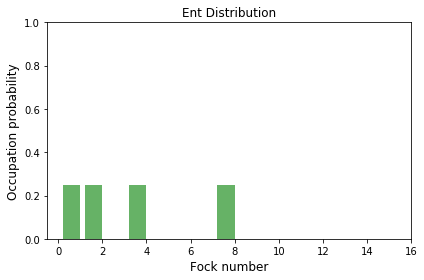

In [10]:
fig, axes = plt.subplots(1,1)
qt.visualization.plot_fock_distribution(ent,fig=fig,ax=axes,title="Ent Distribution")
fig.tight_layout()
plt.show()


Quantum states can also be represented by a density matrix where an $n$ qubit state has a $2^n \times 2^n$ density matrix. The diagonal elements of the density matrix are the probabilities assocaited with measuring that state. The off diagonal elements capture information about the relative phase of each state. What's important here is that the density matrix captures everything we could want to know about a state, not just measurement probabilities.

Density matricies are easily visualized by a hinton diagram via QuTiPs `hinton` procedure. In the hinton diagram we color a $2^n \times 2^n$ grid according to the values in the density matrix where the color scale indicates both the magnitude and sign of the enteries. 

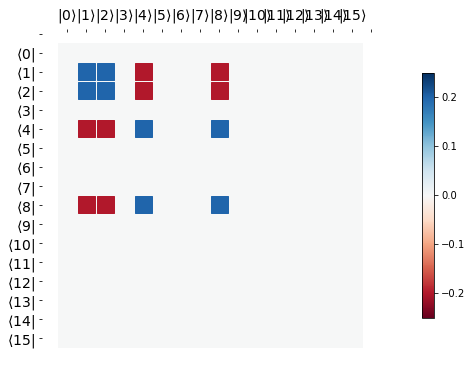

In [28]:
fig, ax = qt.visualization.hinton(qt.ket2dm(ent))
plt.show()

A downside to the hinton diagram is that it must grow along with the size of the space.  Qubism plots solve this by effectiely partitioning the grid into sucessively smaller squares as the space grows. Another potential advantage of Qubism plots is that they visualize a state vector as opposed to the state desity matrix. Once again, color scales is used to represent magnitude and phase. 

In order to do a qubism plot, we must provide `plot_qubism` with a multipartite state. This is likely to mean modifying the dimension of an existing qudit state to reflect the underlying composite qubit state. 

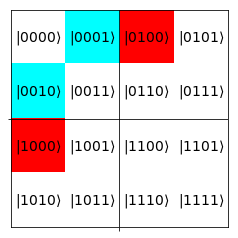

In [24]:
ent_kets = qt.Qobj(ent)
ent_kets.dims=[[2,2,2,2],[1,1,1,1]]
fig,ax = qt.visualization.plot_qubism(ent_kets,legend_iteration=2,figsize=(4,4))
plt.show()

#### Measurement Statistics

Finally, we might just want some basic statistical information about the results of measuring a state in the standard basis. In particular, we want the expected value, variance, and standard deviation (a.k.a. uncertainty). In practice, a standard measurement is likely to be done on a bit by bit basis and relative to some observable with eigenvalues of $\pm1$. we might then translate that to binary, with 1 going to 0 and -1 going to 1, and interpret the result of an $n$ qubit measurement as an $n$ bit, unsigned binary integer. For example, when measuring a 4 qubit system we might end up with $(1,-1,-1,1)$ and interpret that as $0110$ or $5$. Under this regieme we would expect the result of measuring $n$ qubits to be some value from 0 to $2^n$. The expected value, variance, and uncertainty would then follow suit.  

With QuTiP we can skip all of the bitwise measurements and conversion to binary and simply compute the statistics relative to `num(2**n)`. The functions `expect(o,s)` and `variance(o,s)` compute the respective statistics for a given observable `o` and state `s`. The uncertainy is simply the sqrare root of the variance. 

In [11]:

print("Expectation: %.04f" % qt.expect(qt.num(16),ent))
print("Variance: %.4f" % qt.variance(qt.num(16),ent))
print("Uncertainty: %.4f" % np.sqrt(qt.variance(qt.num(16),ent)))


Expectation: 3.7500
Variance: 7.1875
Uncertainty: 2.6810
